In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("imdb_movies_cleaned.csv")

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9750 entries, 0 to 9749
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      9750 non-null   object 
 1   release_date     9750 non-null   object 
 2   imdb_rating      9750 non-null   float64
 3   genre            9750 non-null   object 
 4   budget           9750 non-null   float64
 5   revenue          9750 non-null   float64
 6   country          9750 non-null   object 
 7   release_year     9750 non-null   int64  
 8   profit           9750 non-null   float64
 9   rating_category  9750 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 761.8+ KB


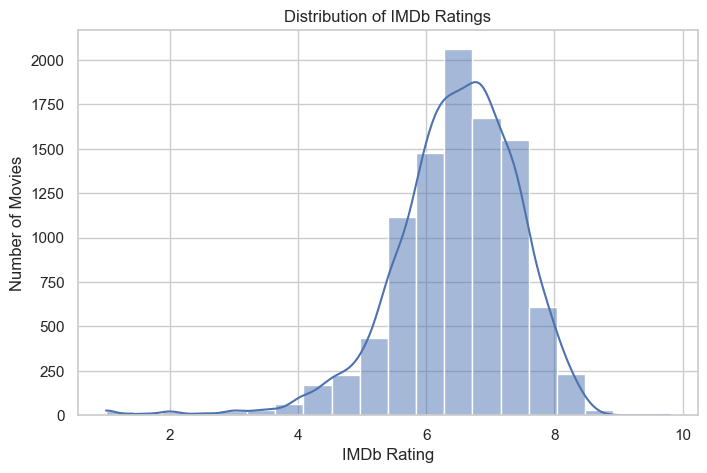

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_rating'], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.show()

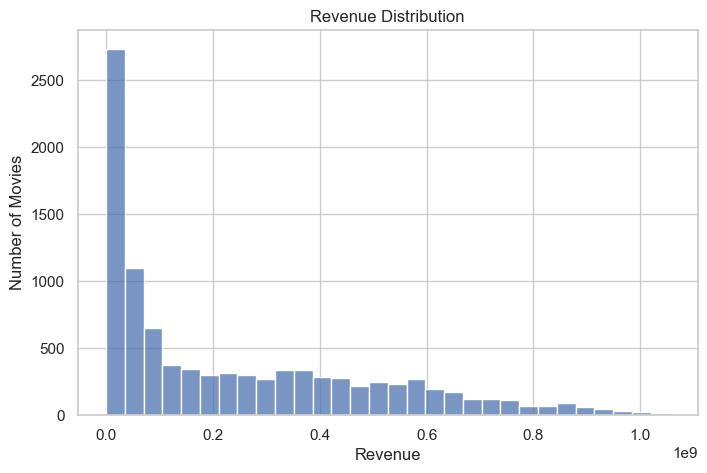

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'], bins=30)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Number of Movies")
plt.show()

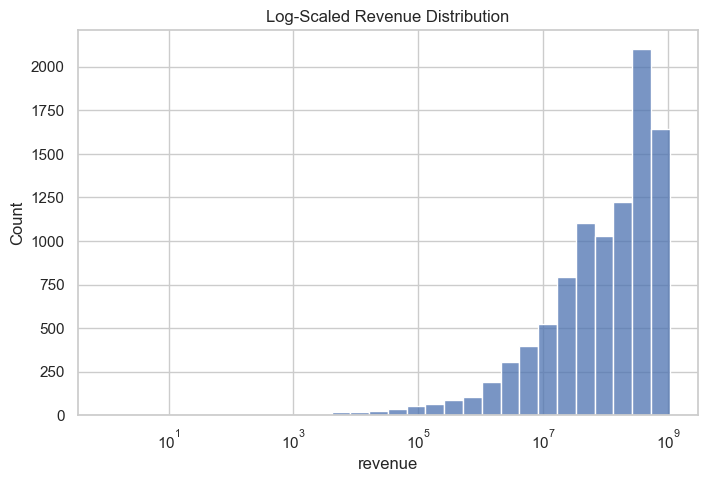

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'], bins=30, log_scale=True)
plt.title("Log-Scaled Revenue Distribution")
plt.show()

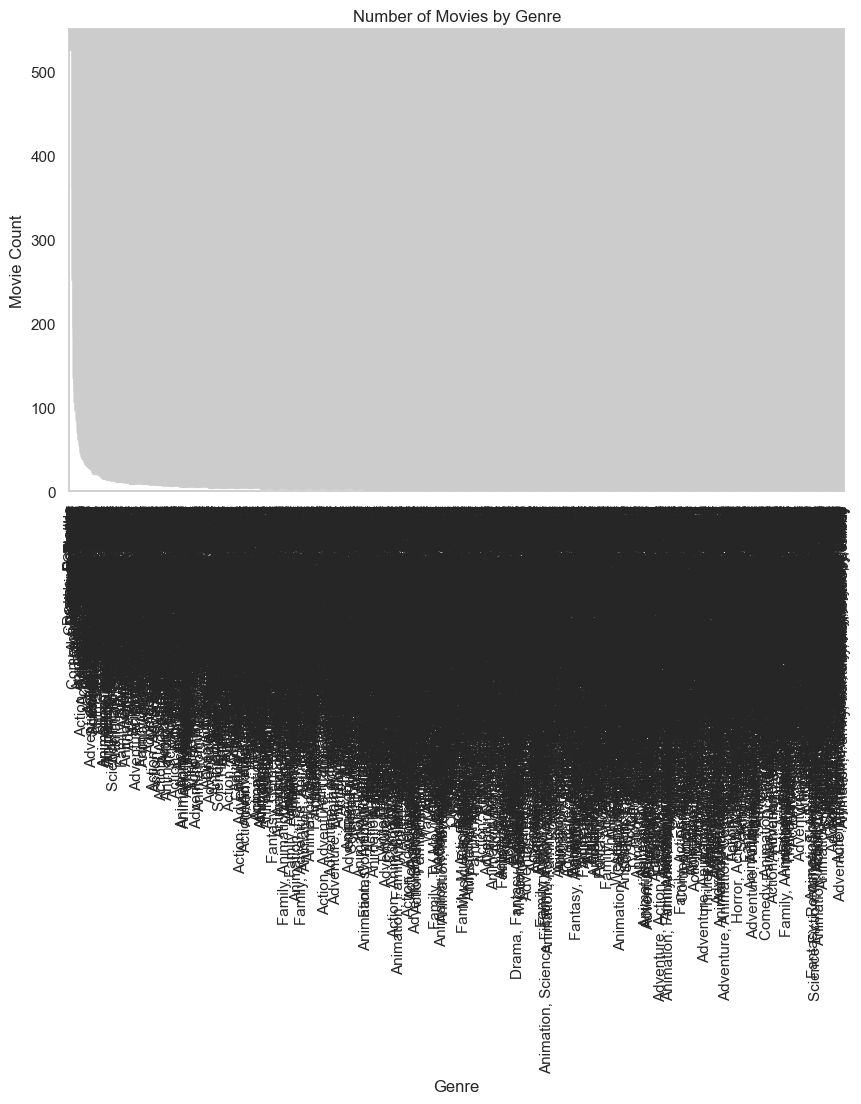

In [7]:
genre_count = df['genre'].value_counts()

plt.figure(figsize=(10,6))
genre_count.plot(kind='bar')
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Movie Count")
plt.show()

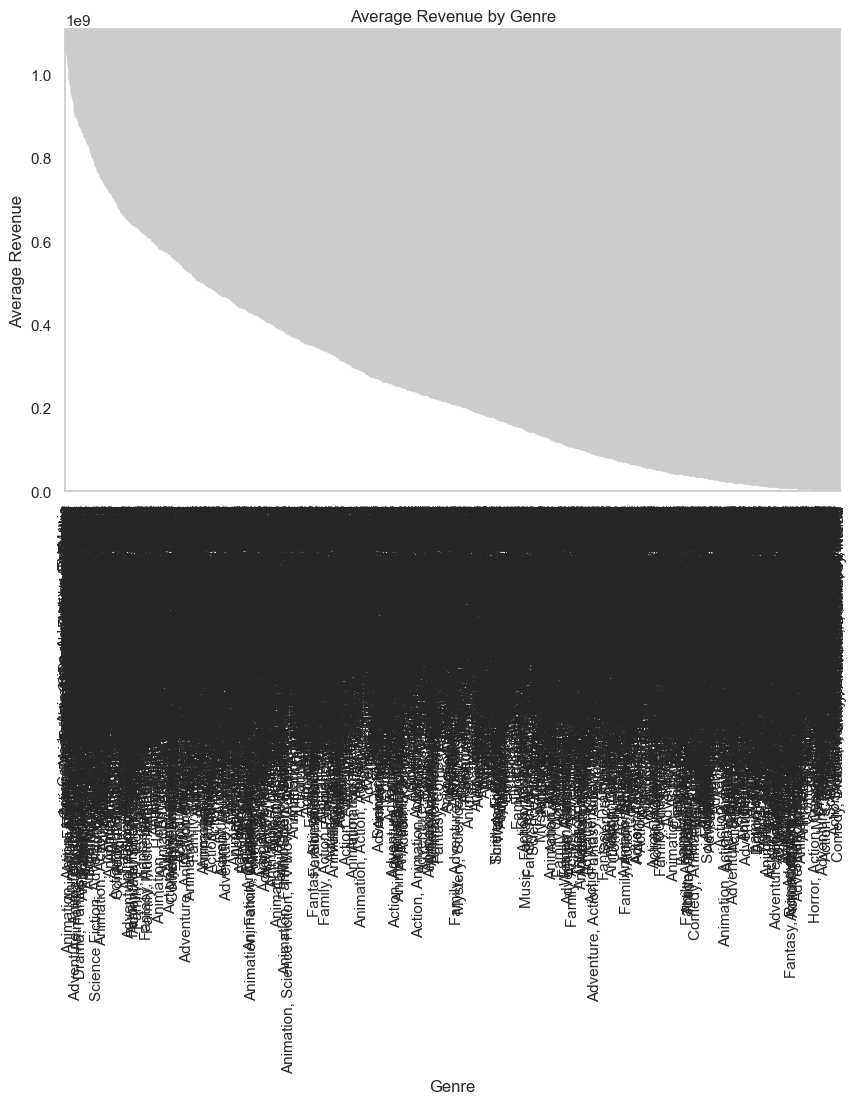

In [8]:
genre_revenue = (
    df.groupby('genre')['revenue']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
genre_revenue.plot(kind='bar')
plt.title("Average Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Revenue")
plt.show()

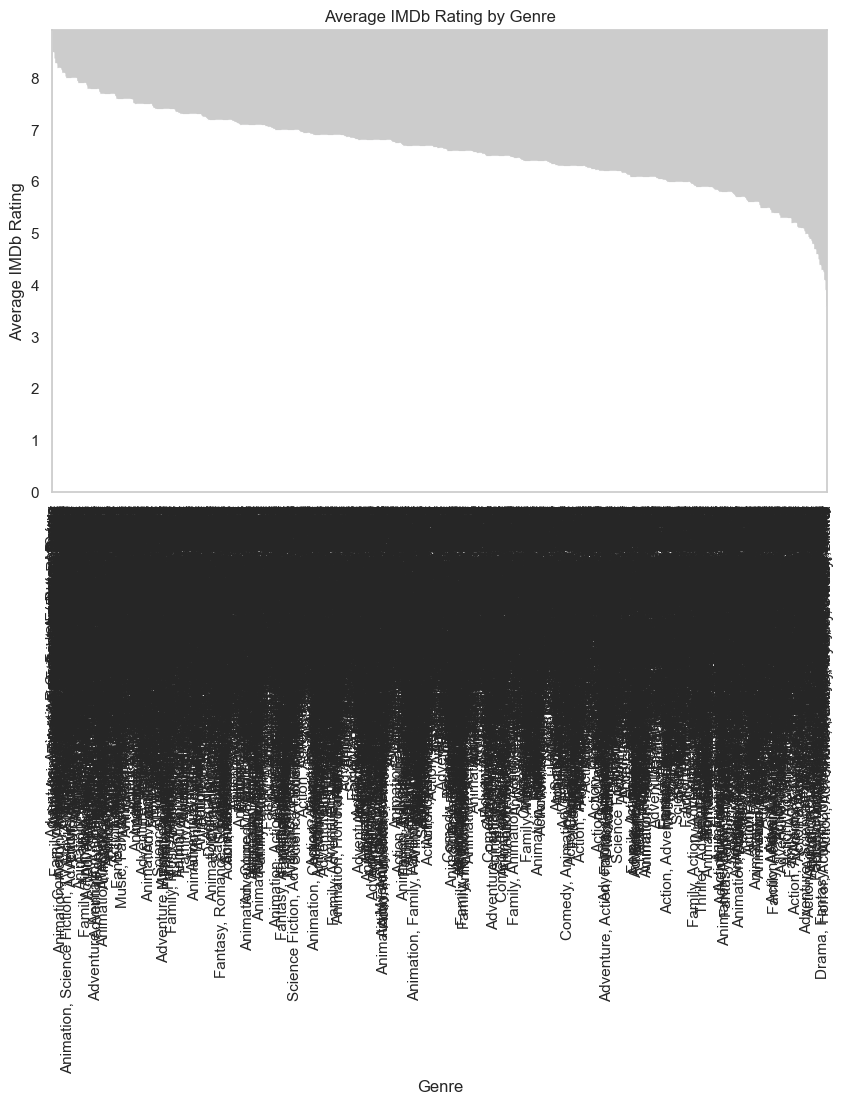

In [11]:
genre_rating = (
    df.groupby('genre')['imdb_rating']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
genre_rating.plot(kind='bar')
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Rating")
plt.show()

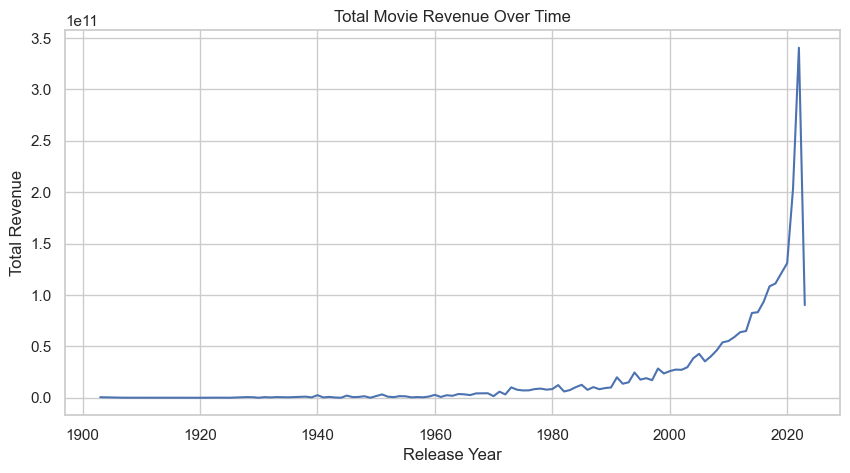

In [19]:
yearly_revenue = df.groupby('release_year')['revenue'].sum()

plt.figure(figsize=(10,5))
yearly_revenue.plot()
plt.title("Total Movie Revenue Over Time")
plt.xlabel("Release Year")
plt.ylabel("Total Revenue")
plt.show()

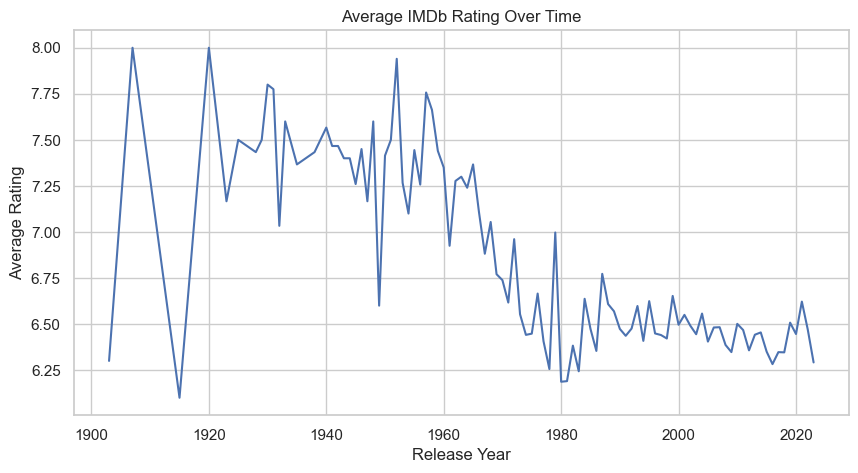

In [20]:
yearly_rating = df.groupby('release_year')['imdb_rating'].mean()

plt.figure(figsize=(10,5))
yearly_rating.plot()
plt.title("Average IMDb Rating Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()

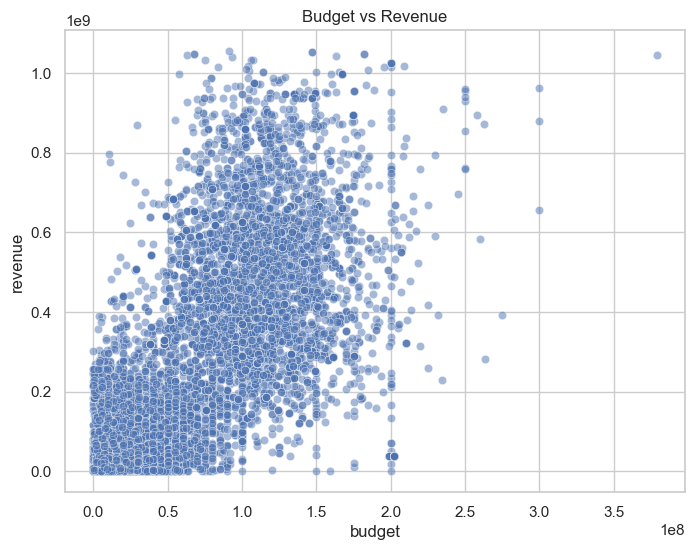

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='budget',
    y='revenue',
    alpha=0.5
)
plt.title("Budget vs Revenue")
plt.show()

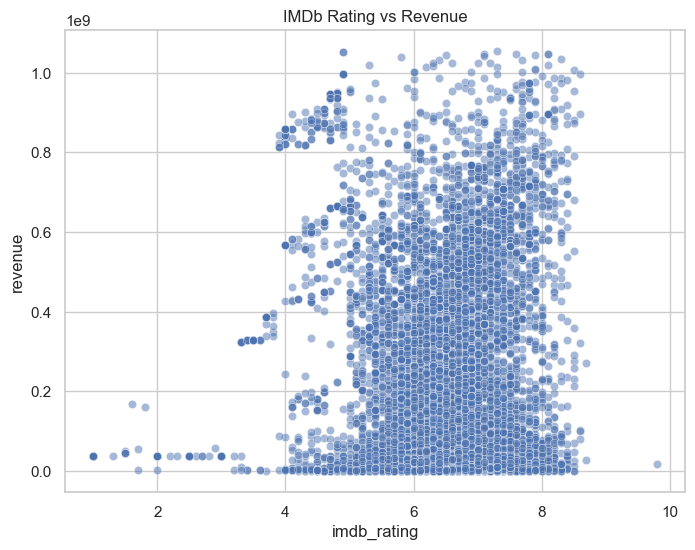

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='imdb_rating',
    y='revenue',
    alpha=0.5
)
plt.title("IMDb Rating vs Revenue")
plt.show()

In [23]:
corr_df = df[['budget', 'revenue', 'profit', 'imdb_rating']]
correlation = corr_df.corr()

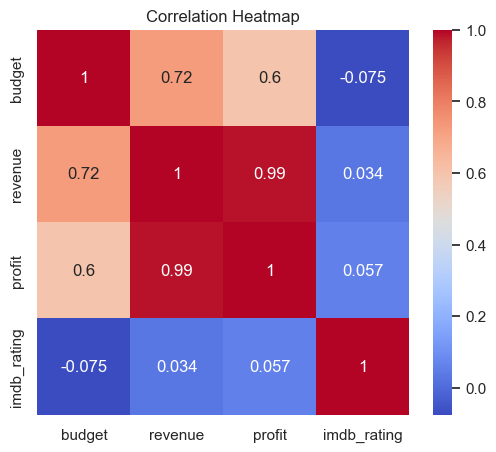

In [24]:
plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

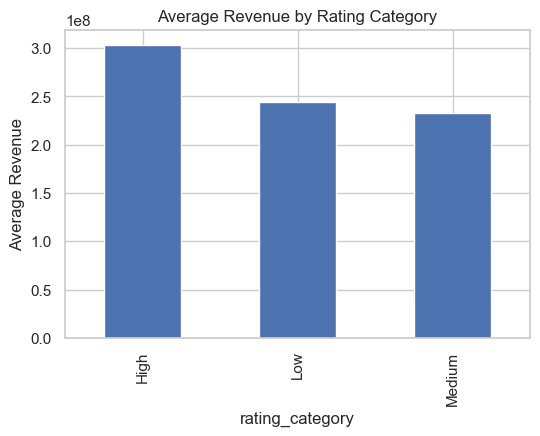

In [25]:
rating_revenue = (
    df.groupby('rating_category')['revenue']
    .mean()
)

rating_revenue.plot(kind='bar', figsize=(6,4))
plt.title("Average Revenue by Rating Category")
plt.ylabel("Average Revenue")
plt.show()